# Tahap Seleksi Fitur dan Modeling

### Import Data Hasil Preprocessing

In [46]:
import pandas as pd 
import numpy as np

fix_data= pd.read_excel("C:/Users/Widnyana/Documents/SMT 4 WALAWE/TUGAS KLP/PPDM/UTS_C1_PPDM/preprocessing/data_prep.xlsx", usecols=["label", "Stemming"])
pd.set_option('display.max_colwidth', None)
fix_data.columns = ["label", "Review"]
fix_data

,label,Review
0,0,"['mohon', 'use', 'another', 'option', 'verify', 'nomor', 'than', 'whatsap', 'mesage', 'or', 'phone', 'cal', 'may', 'be', 'the', 'option', 'mohon', 'opsi', 'verifikasi', 'nomor', 'telepon', 'whatsap', 'whatsap']"
1,1,['bantu']
2,0,"['aplikasi', 'bug']"
3,1,['bantu']
4,1,['bagus']
...,...,...
2015,0,"['ap', 'bermutustiap', 'baharu', 'bisap', 'mau', 'smuanya', 'serba', 'it', 'sumberdayanya', 'siaptidak', 'mutu']"
2016,0,"['aplikasi', 'aneh']"
2017,0,"['aplikasi', 'baharu', 'jadiatu', 'sehat', 'buka']"
2018,1,['muas']


In [47]:
fix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2020 non-null   int64 
 1   Review  2020 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.7+ KB


In [48]:

# Menghitung jumlah baris sebelum penghapusan
total_rows_before = len(fix_data)

# Menghapus baris dengan kolom 'reviews' berisi '[]' dan menghitung jumlahnya
data_rill = fix_data[fix_data['Review'] != '[]']
num_rows_deleted = total_rows_before - len(data_rill)

# Cetak jumlah data yang terhapus
print("Jumlah data yang terhapus:", num_rows_deleted)

# Cetak DataFrame setelah penghapusan
print(data_rill)


Jumlah data yang terhapus: 104
      label  \
0         0   
1         1   
2         0   
3         1   
4         1   
...     ...   
2015      0   
2016      0   
2017      0   
2018      1   
2019      0   

                                                                                                                                                                                                                  Review  
0     ['mohon', 'use', 'another', 'option', 'verify', 'nomor', 'than', 'whatsap', 'mesage', 'or', 'phone', 'cal', 'may', 'be', 'the', 'option', 'mohon', 'opsi', 'verifikasi', 'nomor', 'telepon', 'whatsap', 'whatsap']  
1                                                                                                                                                                                                              ['bantu']  
2                                                                                                                                  

In [49]:
# Simpan DataFrame ke dalam file Excel
data_rill.to_excel('fix_data.xlsx', index=False)

In [50]:
data_rill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1916 entries, 0 to 2019
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1916 non-null   int64 
 1   Review  1916 non-null   object
dtypes: int64(1), object(1)
memory usage: 44.9+ KB


### Pembagian Data

In [51]:
from sklearn.model_selection import train_test_split

label = data_rill["label"]
text = data_rill["Review"]
train_data, test_data, train_labels, test_labels = train_test_split(text, label, test_size=0.4, random_state=42)

negative_count_train = (train_labels == 0).sum()
positive_count_train = (train_labels == 1).sum()
total_count_train = len(train_labels)

# Mencetak jumlah data positif, negatif pada data latih
print("Jumlah data latih negatif :", negative_count_train)
print("Jumlah data latih positif :", positive_count_train)

negative_count_test = (test_labels == 0).sum()
positive_count_test = (test_labels == 1).sum()
total_count_test = len(test_labels)

# Mencetak jumlah data positif, negatif pada data uji
print("Jumlah data uji negatif :", negative_count_test)
print("Jumlah data uji positif :", positive_count_test)

total_count = positive_count_train + negative_count_train +  positive_count_test + negative_count_test
print("Jumlah data latih + train :", total_count)

Jumlah data latih negatif : 614
Jumlah data latih positif : 535
Jumlah data uji negatif : 397
Jumlah data uji positif : 370
Jumlah data latih + train : 1916


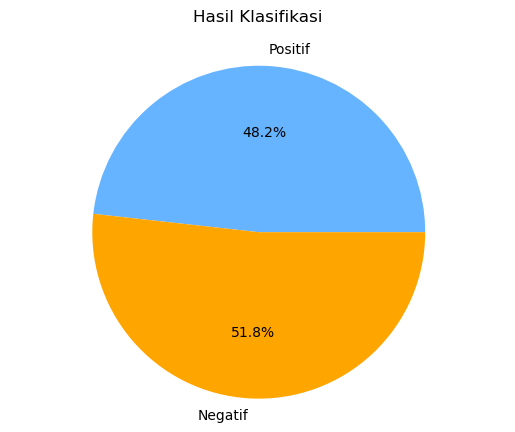

In [52]:
import matplotlib.pyplot as plt

# Data untuk visualisasi
labels = ['Positif', 'Negatif']
sizes = [positive_count_test, negative_count_test]
colors = ['#66B3FF', '#FFA500']  # Warna biru, oranye, dan hijau

# Membuat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Hasil Klasifikasi\n')

# Menampilkan plot
plt.axis('equal')
plt.show()


In [53]:
#Menyimpan data latih
train_data.to_excel ('train_data.xlsx', index=False)

In [54]:
#Menyimpan data testing
test_data.to_excel ('test_data.xlsx', index=False)

### Ekstraksi Fitur TF-IDF (Term Frequency-Inverse Document Frequency)

####
1.	Term Frequency (TF): Ini mengukur seberapa sering sebuah kata muncul dalam sebuah dokumen. Ini dihitung dengan menghitung jumlah kemunculan kata dalam dokumen, dibagi dengan total jumlah kata dalam dokumen tersebut.
2.	Inverse Document Frequency (IDF): Ini mengukur seberapa penting sebuah kata secara keseluruhan dalam koleksi dokumen. Ini dihitung dengan membagi jumlah total dokumen dalam koleksi dengan jumlah dokumen yang mengandung kata tersebut, lalu mengambil logaritma dari hasilnya.
3.	TF-IDF Score: Ini adalah hasil perkalian antara TF dan IDF. Ini memberikan bobot yang lebih tinggi pada kata-kata yang muncul secara sering dalam dokumen tertentu tetapi jarang muncul di dokumen lain.


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# Membuat CountVectorizer
cvect = CountVectorizer()
TF_vector_train = cvect.fit_transform(train_data)

# Mengubah data latih menjadi vektor TF (Term Frequency
TF_df_train = pd.DataFrame(TF_vector_train.toarray(), columns=cvect.get_feature_names_out())

# Menampilkan dataframes
print("TF vector train:")
TF_df_train

TF vector train:


,abai,abal,abaout,acara,acount,acses,adafitur,adaini,admin,adu,...,woi,worth,woy,xiaomi,ya,yadiperbarui,yah,yang,yatrus,ye
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [56]:
# Mengecek panjang vocab (jumlah unik kata)
vocab_length = len(cvect.get_feature_names_out())
print("Panjang vocab:", vocab_length)

Panjang vocab: 1208


####
Hasil yang ditampilkan adalah matriks TF (Term Frequency) dari data latih setelah diubah menggunakan CountVectorizer. Dalam matriks ini, setiap baris mewakili satu dokumen (dalam kasus ini, ulasan atau teks), dan setiap kolom mewakili jumlah kemunculan kata tertentu dalam dokumen tersebut.

Misalnya, jika pada baris ke-0 dan kolom ke-"aamiin" terdapat angka 0, itu berarti kata "aamiin" tidak muncul dalam dokumen pertama. Sedangkan jika pada baris ke-2 dan kolom ke-"abdet" terdapat angka 1, itu berarti kata "abdet" muncul satu kali dalam dokumen ketiga.

Jumlah baris matriks (1149) adalah jumlah dokumen dalam data latih, dan jumlah kolom matriks (1208) adalah jumlah kata unik dalam seluruh data latih setelah diubah menggunakan CountVectorizer.


In [57]:
# Perhitungan TF vector pada test set menggunakan CountVectorizer (cvect) yang sudah dilatih pada train set
TF_vector_test = cvect.transform(test_data)

# Mengubah data uji menjadi vektor TF (Term Frequency)
TF_df_test = pd.DataFrame(TF_vector_test.toarray(), columns=cvect.get_feature_names_out())

print("TF vector Test:")
TF_df_test

TF vector Test:


,abai,abal,abaout,acara,acount,acses,adafitur,adaini,admin,adu,...,woi,worth,woy,xiaomi,ya,yadiperbarui,yah,yang,yatrus,ye
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Membuat TfidfVectorizer dengan pengaturan default
tfidf_vectorizer = TfidfVectorizer()

# Melakukan transformasi pada data latih dan uji
TFIDF_vector_train = tfidf_vectorizer.fit_transform(train_data)
TFIDF_vector_test = tfidf_vectorizer.transform(test_data)

# Konversi hasil transformasi ke dalam DataFrame untuk memudahkan visualisasi (opsional)
TFIDF_df_train = pd.DataFrame(TFIDF_vector_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
TFIDF_df_test = pd.DataFrame(TFIDF_vector_test.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Menampilkan hasil transformasi
print("TF-IDF vector train:")
print(TFIDF_df_train)

print("TF-IDF vector test:")
print(TFIDF_df_test)


TF-IDF vector train:
      abai  abal  abaout  acara  acount  acses  adafitur  adaini  admin  adu  \
0      0.0   0.0     0.0    0.0     0.0    0.0       0.0     0.0    0.0  0.0   
1      0.0   0.0     0.0    0.0     0.0    0.0       0.0     0.0    0.0  0.0   
2      0.0   0.0     0.0    0.0     0.0    0.0       0.0     0.0    0.0  0.0   
3      0.0   0.0     0.0    0.0     0.0    0.0       0.0     0.0    0.0  0.0   
4      0.0   0.0     0.0    0.0     0.0    0.0       0.0     0.0    0.0  0.0   
...    ...   ...     ...    ...     ...    ...       ...     ...    ...  ...   
1144   0.0   0.0     0.0    0.0     0.0    0.0       0.0     0.0    0.0  0.0   
1145   0.0   0.0     0.0    0.0     0.0    0.0       0.0     0.0    0.0  0.0   
1146   0.0   0.0     0.0    0.0     0.0    0.0       0.0     0.0    0.0  0.0   
1147   0.0   0.0     0.0    0.0     0.0    0.0       0.0     0.0    0.0  0.0   
1148   0.0   0.0     0.0    0.0     0.0    0.0       0.0     0.0    0.0  0.0   

      ...  woi  wo

In [59]:
# Fungsi untuk menampilkan kata dengan bobot 
def tampilkan_kata_bobot_terbesar(tfidf_df, n=1):
    for index, row in tfidf_df.iterrows():
        sorted_row = row.sort_values(ascending=False)
        top_n_words = sorted_row.head(n)
        print(f"Dokumen {index + 1}:")
        for word, score in top_n_words.items():
            print(f"Kata: '{word}', Bobot: {score}")
        print()

# Menampilkan kata dengan bobot untuk data latih
print("Kata dengan bobot pada data latih:")
tampilkan_kata_bobot_terbesar(TFIDF_df_train, n=1)

# Menampilkan kata dengan bobot untuk data uji
print("Kata dengan bobot pada data uji:")
tampilkan_kata_bobot_terbesar(TFIDF_df_test, n=1)



Kata dengan bobot pada data latih:
Dokumen 1:
Kata: 'maaf', Bobot: 0.6196794907842917

Dokumen 2:
Kata: 'tg', Bobot: 0.5518920281654637

Dokumen 3:
Kata: 'mimta', Bobot: 0.7456926271272601

Dokumen 4:
Kata: 'update', Bobot: 0.8090367017564194

Dokumen 5:
Kata: 'susah', Bobot: 0.6497898356894706

Dokumen 6:
Kata: 'apk', Bobot: 0.5117600649117834

Dokumen 7:
Kata: 'baharu', Bobot: 1.0

Dokumen 8:
Kata: 'up', Bobot: 0.7432014285080693

Dokumen 9:
Kata: 'diupdate', Bobot: 0.5488847441844167

Dokumen 10:
Kata: 'pakai', Bobot: 0.7591323893410005

Dokumen 11:
Kata: 'smakin', Bobot: 0.7763502490243087

Dokumen 12:
Kata: 'jelek', Bobot: 0.7624785435270363

Dokumen 13:
Kata: 'download', Bobot: 0.39995888653430905

Dokumen 14:
Kata: 'bantu', Bobot: 1.0

Dokumen 15:
Kata: 'kondisi', Bobot: 0.5307304088739553

Dokumen 16:
Kata: 'bintang', Bobot: 0.6966537705330987

Dokumen 17:
Kata: 'baru', Bobot: 0.4069842907193972

Dokumen 18:
Kata: 'cari', Bobot: 0.4996452420199131

Dokumen 19:
Kata: 'nrpergian'

### Seleksi Fitur Chi Square 

#### 
Konsep Seleksi Fitur Chi-Square:

•	Seleksi fitur menggunakan metode chi-square bertujuan untuk memilih fitur-fitur yang paling informatif dalam membedakan kelas target.

•	Metode ini menghitung seberapa kuat hubungan antara masing-masing fitur (kata-kata dalam kasus pemrosesan teks) dengan kelas target.

•	Semakin besar nilai chi-square, semakin kuat hubungan antara fitur tersebut dengan kelas target. Oleh karena itu, fitur-fitur dengan nilai chi-square yang tinggi lebih mungkin dipilih karena lebih informatif.


In [60]:
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Membuat TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Menghitung vektor TF-IDF pada data latih dan uji
TFIDF_vector_train = tfidf_vectorizer.fit_transform(train_data)
TFIDF_vector_test = tfidf_vectorizer.transform(test_data)

# Percentase fitur yang dipilih (40%)
percent = 40

# Menghitung jumlah fitur yang diinginkan berdasarkan persentase
k = int(percent / 100 * TFIDF_vector_train.shape[1])

# Melakukan seleksi fitur dengan metode chi-square pada set data latih
selector = SelectPercentile(chi2, percentile=percent)
tfidf_mat_train_selected = selector.fit_transform(TFIDF_vector_train, train_labels)

# Melakukan seleksi fitur yang sama pada set data uji
tfidf_mat_test_selected = selector.transform(TFIDF_vector_test)

# Mendapatkan term-term fitur yang terpilih
selected_feature_names = [feature_name for feature_name, selected in zip(tfidf_vectorizer.get_feature_names_out(), selector.get_support()) if selected]

# Membuat dataframe untuk fitur-fitur yang terpilih pada set data latih dan tes
tfidf_df_train_selected = pd.DataFrame(tfidf_mat_train_selected.toarray(), columns=selected_feature_names)
tfidf_df_test_selected = pd.DataFrame(tfidf_mat_test_selected.toarray(), columns=selected_feature_names)

# Menampilkan dataframe set data latih 
print("Selected Features in Train Set:")
print(tfidf_df_train_selected)



Selected Features in Train Set:
      abal  adafitur  adu   ae   ah  ajatolong  akhirakhir  akses  aktiviras  \
0      0.0       0.0  0.0  0.0  0.0        0.0         0.0    0.0        0.0   
1      0.0       0.0  0.0  0.0  0.0        0.0         0.0    0.0        0.0   
2      0.0       0.0  0.0  0.0  0.0        0.0         0.0    0.0        0.0   
3      0.0       0.0  0.0  0.0  0.0        0.0         0.0    0.0        0.0   
4      0.0       0.0  0.0  0.0  0.0        0.0         0.0    0.0        0.0   
...    ...       ...  ...  ...  ...        ...         ...    ...        ...   
1144   0.0       0.0  0.0  0.0  0.0        0.0         0.0    0.0        0.0   
1145   0.0       0.0  0.0  0.0  0.0        0.0         0.0    0.0        0.0   
1146   0.0       0.0  0.0  0.0  0.0        0.0         0.0    0.0        0.0   
1147   0.0       0.0  0.0  0.0  0.0        0.0         0.0    0.0        0.0   
1148   0.0       0.0  0.0  0.0  0.0        0.0         0.0    0.0        0.0   

      a

#### 
Hasil dari seleksi fitur Chi-Square di atas adalah sebuah DataFrame yang menampilkan matriks TF (Term Frequency) dari data latih setelah fitur-fiturnya dipilih menggunakan metode Chi-Square. DataFrame tersebut memiliki dimensi 1936 baris dan 2122 kolom, yang menunjukkan jumlah data latih dan jumlah fitur yang terpilih.

Setiap baris dalam DataFrame mewakili satu sampel data latih, sedangkan setiap kolom mewakili satu fitur (kata dalam teks). Nilai di setiap sel mewakili frekuensi kemunculan fitur tersebut dalam sampel data latih. Jika nilai di suatu sel adalah 0, berarti fitur tersebut tidak muncul dalam sampel tersebut, sedangkan jika nilainya lebih dari 0, berarti fitur tersebut muncul dalam sampel tersebut.

Misalnya, jika nilai di sel (baris 0, kolom "aamiin") adalah 0, itu berarti kata "aamiin" tidak muncul dalam sampel data latih yang pertama. Sedangkan jika nilai di sel (baris 1, kolom "abai") adalah 0, itu berarti kata "abai" juga tidak muncul dalam sampel data latih yang kedua.

In [61]:
#Menampilkan dataframe set data uji (TF IDF)
print("\nSelected Features in Test Set:")
tfidf_df_test_selected


Selected Features in Test Set:


,abal,adafitur,adu,ae,ah,ajatolong,akhirakhir,akses,aktiviras,akurat,...,vaksinya,verifikasi,versi,verso,via,vukup,wa,whatsap,ya,yadiperbarui
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.206578,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Modeling Naive Bayes dan Validasi Model

In [62]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi model klasifikasi MULTINOMIAL NAIVE BAYES
model = MultinomialNB()

# Tentukan jumlah fold untuk K-Fold cross-validation
num_folds = 10

# Inisialisasi KFold
kf = KFold(n_splits=num_folds)

# List untuk menyimpan akurasi dari setiap fold
accuracies = []

# Iterasi melalui setiap fold
for train_index, val_index in kf.split(TFIDF_df_train):
    # Bagi data menjadi data latih dan data validasi
    X_train_fold, X_val_fold = TFIDF_df_train.iloc[train_index], TFIDF_df_train.iloc[val_index]
    y_train_fold, y_val_fold = train_labels.iloc[train_index], train_labels.iloc[val_index]
    
    # Training model pada data latih
    model.fit(X_train_fold, y_train_fold)
    
    # Lakukan prediksi pada data validasi
    y_pred_fold = model.predict(X_val_fold)
    
    # Hitung dan simpan akurasi
    fold_accuracy = accuracy_score(y_val_fold, y_pred_fold)
    accuracies.append(fold_accuracy)

# Hitung rata-rata akurasi dari semua fold
average_accuracy = sum(accuracies) / len(accuracies)

print("Average Cross-Validation Accuracy:", average_accuracy)


Average Cross-Validation Accuracy: 0.8737681159420291


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score

# List untuk menyimpan matriks evaluasi dan akurasi dari setiap fold
evaluations = []

# Iterasi melalui setiap fold
for fold, (train_index, val_index) in enumerate(kf.split(TFIDF_df_train), 1):
    # Bagi data menjadi data latih dan data validasi
    X_train_fold, X_val_fold = TFIDF_df_train.iloc[train_index], TFIDF_df_train.iloc[val_index]
    y_train_fold, y_val_fold = train_labels.iloc[train_index], train_labels.iloc[val_index]
    
    # Training model pada data latih
    model.fit(X_train_fold, y_train_fold)
    
    # Lakukan prediksi pada data validasi
    y_pred_fold = model.predict(X_val_fold)
    
    # Hitung matriks evaluasi
    confusion_mat = confusion_matrix(y_val_fold, y_pred_fold)
    fold_accuracy = accuracy_score(y_val_fold, y_pred_fold)
    
    # Simpan matriks evaluasi dan akurasi
    evaluations.append((fold, confusion_mat, fold_accuracy))

    # Cetak matriks evaluasi dan akurasi untuk setiap fold
    print(f"Fold {fold} Evaluation:")
    print("Confusion Matrix:")
    print(confusion_mat)
    print("Accuracy:", fold_accuracy)
    print()

# Cetak akurasi terbesar, terkecil, dan rata-rata
accuracies = [eval[2] for eval in evaluations]
max_accuracy = max(accuracies)
min_accuracy = min(accuracies)
average_accuracy = sum(accuracies) / len(accuracies)

print("Maximum Accuracy:", max_accuracy)
print("Minimum Accuracy:", min_accuracy)
print("Average Accuracy:", average_accuracy)


Fold 1 Evaluation:
Confusion Matrix:
[[60  6]
 [ 9 40]]
Accuracy: 0.8695652173913043

Fold 2 Evaluation:
Confusion Matrix:
[[56  3]
 [15 41]]
Accuracy: 0.8434782608695652

Fold 3 Evaluation:
Confusion Matrix:
[[72  2]
 [ 7 34]]
Accuracy: 0.9217391304347826

Fold 4 Evaluation:
Confusion Matrix:
[[60  2]
 [ 5 48]]
Accuracy: 0.9391304347826087

Fold 5 Evaluation:
Confusion Matrix:
[[53  4]
 [14 44]]
Accuracy: 0.8434782608695652

Fold 6 Evaluation:
Confusion Matrix:
[[54  4]
 [12 45]]
Accuracy: 0.8608695652173913

Fold 7 Evaluation:
Confusion Matrix:
[[56  6]
 [ 9 44]]
Accuracy: 0.8695652173913043

Fold 8 Evaluation:
Confusion Matrix:
[[56  1]
 [12 46]]
Accuracy: 0.8869565217391304

Fold 9 Evaluation:
Confusion Matrix:
[[55  5]
 [10 45]]
Accuracy: 0.8695652173913043

Fold 10 Evaluation:
Confusion Matrix:
[[53  6]
 [13 42]]
Accuracy: 0.8333333333333334

Maximum Accuracy: 0.9391304347826087
Minimum Accuracy: 0.8333333333333334
Average Accuracy: 0.8737681159420291


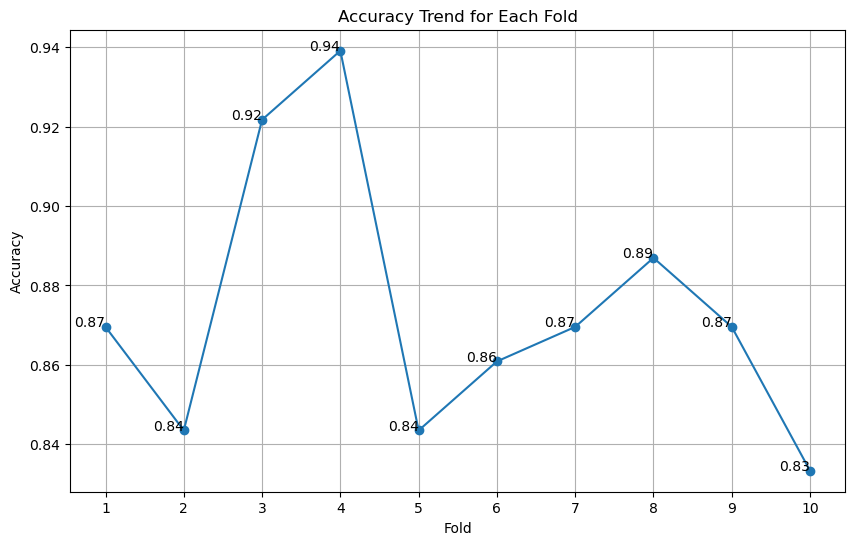

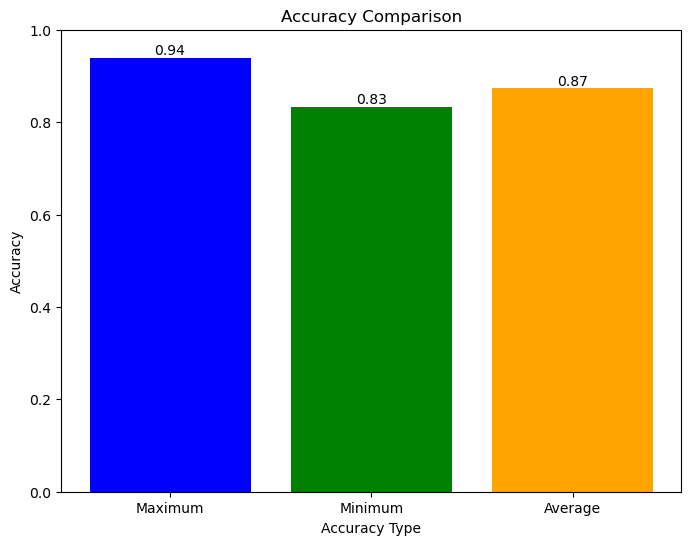

In [64]:
import matplotlib.pyplot as plt

# Extract accuracy for each fold
fold_numbers = [eval[0] for eval in evaluations]
accuracies = [eval[2] for eval in evaluations]

# Plotting accuracy trend for each fold
plt.figure(figsize=(10, 6))
plt.plot(fold_numbers, accuracies, marker='o', linestyle='-')
plt.title('Accuracy Trend for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, num_folds + 1))
plt.grid(True)

# Add data labels
for i, txt in enumerate(accuracies):
    plt.text(fold_numbers[i], txt, f'{txt:.2f}', ha='right')

plt.show()

# Plotting bar chart for maximum, minimum, and average accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Maximum', 'Minimum', 'Average'], [max_accuracy, min_accuracy, average_accuracy], color=['blue', 'green', 'orange'])
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to ensure visibility of bars

# Add data labels
for i, v in enumerate([max_accuracy, min_accuracy, average_accuracy]):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()


In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold

# List untuk menyimpan evaluasi dari setiap fold
evaluations = []

# Inisialisasi KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Iterasi melalui setiap fold
for fold, (train_index, val_index) in enumerate(kf.split(TFIDF_df_train), 1):
    # Bagi data menjadi data latih dan data validasi
    X_train_fold, X_val_fold = TFIDF_df_train.iloc[train_index], TFIDF_df_train.iloc[val_index]
    y_train_fold, y_val_fold = train_labels.iloc[train_index], train_labels.iloc[val_index]
    
    # Training model pada data latih
    model.fit(X_train_fold, y_train_fold)
    
    # Lakukan prediksi pada data validasi
    y_pred_fold = model.predict(X_val_fold)
    
    # Hitung matriks evaluasi
    confusion_mat = confusion_matrix(y_val_fold, y_pred_fold)
    fold_accuracy = accuracy_score(y_val_fold, y_pred_fold)
    class_report = classification_report(y_val_fold, y_pred_fold)
    
    # Simpan matriks evaluasi dan akurasi
    evaluations.append((fold, confusion_mat, fold_accuracy, class_report))

    # Cetak matriks evaluasi dan akurasi untuk setiap fold
    print(f"Fold {fold} Evaluation:")
    print("Confusion Matrix:")
    print(confusion_mat)
    print("Accuracy:", fold_accuracy)
    print("Classification Report:")
    print(class_report)
    print()

# Cetak akurasi terbesar, terkecil, dan rata-rata
accuracies = [eval[2] for eval in evaluations]
max_accuracy = max(accuracies)
min_accuracy = min(accuracies)
average_accuracy = sum(accuracies) / len(accuracies)

print("Maximum Accuracy:", max_accuracy)
print("Minimum Accuracy:", min_accuracy)
print("Average Accuracy:", average_accuracy)


Fold 1 Evaluation:
Confusion Matrix:
[[61  4]
 [ 8 42]]
Accuracy: 0.8956521739130435
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        65
           1       0.91      0.84      0.88        50

    accuracy                           0.90       115
   macro avg       0.90      0.89      0.89       115
weighted avg       0.90      0.90      0.90       115


Fold 2 Evaluation:
Confusion Matrix:
[[55  2]
 [14 44]]
Accuracy: 0.8608695652173913
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87        57
           1       0.96      0.76      0.85        58

    accuracy                           0.86       115
   macro avg       0.88      0.86      0.86       115
weighted avg       0.88      0.86      0.86       115


Fold 3 Evaluation:
Confusion Matrix:
[[56  4]
 [10 45]]
Accuracy: 0.8782608695652174
Classification Report:
              precis

### Pengujian Model pada Data Testing

In [66]:
from sklearn.naive_bayes import MultinomialNB

# Membuat model Naive Bayes Multinomial dengan class prior yang sesuai
model = MultinomialNB()

# Melatih model menggunakan data latih yang terpilih
model.fit(tfidf_mat_train_selected, train_labels)

# Melakukan prediksi pada data uji yang terpilih
predictions = model.predict(tfidf_mat_test_selected)

# Membuat dataframe dengan data uji, label asli, dan label prediksi
results_df = pd.DataFrame({'Data Testing': tfidf_df_test_selected.index, 'Label Asli': test_labels, 'Label Prediksi': predictions})

# Menampilkan dataframe
results_df


,Data Testing,Label Asli,Label Prediksi
1019,0,0,0
1551,1,0,0
654,2,0,0
534,3,0,0
1401,4,0,0
...,...,...,...
306,762,1,0
807,763,1,0
673,764,1,0
923,765,1,1


### evaluasi sebelum tuning

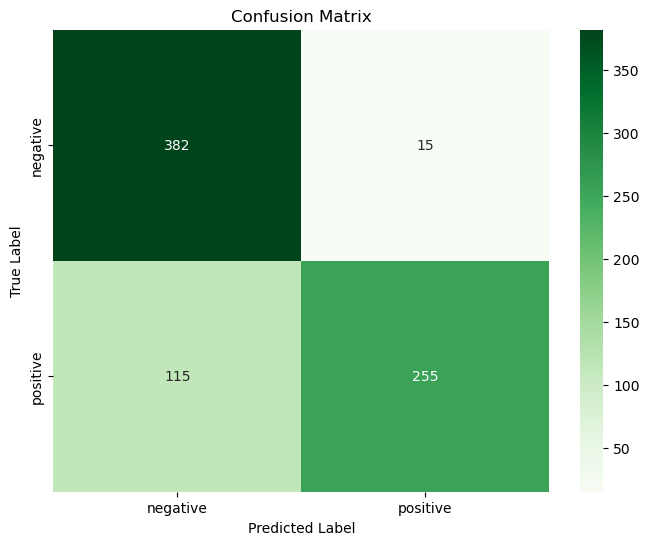

Akurasi  : 0.8305084745762712
Precision: 0.853433217004475
Recall   : 0.8305084745762712
F1-score : 0.8267463409547643

Classification Report:

              precision    recall  f1-score   support

    negative       0.77      0.96      0.85       397
    positive       0.94      0.69      0.80       370

    accuracy                           0.83       767
   macro avg       0.86      0.83      0.83       767
weighted avg       0.85      0.83      0.83       767



In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sn

# Membuat confusion matrix
columns = ['negative', 'positive']
confm = confusion_matrix(test_labels, predictions)
df_cm = pd.DataFrame(confm, index=columns, columns=columns)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sn.heatmap(df_cm, cmap='Greens', annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Menghitung akurasi
accuracy = accuracy_score(test_labels, predictions)
print("Akurasi  :", accuracy)

# Menghitung precision
precision = precision_score(test_labels, predictions, average='weighted')
print("Precision:", precision)

# Menghitung recall
recall = recall_score(test_labels, predictions, average='weighted')
print("Recall   :", recall)

# Menghitung F1-score
f1 = f1_score(test_labels, predictions, average='weighted')
print("F1-score :", f1)

# Mencetak classification report
report = classification_report(test_labels, predictions, target_names=columns)
print("\nClassification Report:\n")
print(report)


### Modeling Random Forest

Hasil Pengujian data test dengan random forest model

In [68]:
# COBA RANDOM FOREST 
from sklearn.ensemble import RandomForestClassifier

# Membuat model Random Forest
model_rf = RandomForestClassifier()

# Melatih model menggunakan data latih yang terpilih
model_rf.fit(tfidf_mat_train_selected, train_labels)

# Melakukan prediksi pada data uji yang terpilih
predictions_rf = model_rf.predict(tfidf_mat_test_selected)

# Membuat dataframe dengan data uji, label asli, dan label prediksi dari model Random Forest
results_df_rf = pd.DataFrame({'Data Testing': tfidf_df_test_selected.index, 'Label Asli': test_labels, 'Label Prediksi RF': predictions_rf})

# Menampilkan dataframe
results_df_rf


,Data Testing,Label Asli,Label Prediksi RF
1019,0,0,0
1551,1,0,0
654,2,0,0
534,3,0,0
1401,4,0,0
...,...,...,...
306,762,1,0
807,763,1,1
673,764,1,0
923,765,1,1


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       397
           1       0.88      0.80      0.84       370

    accuracy                           0.85       767
   macro avg       0.86      0.85      0.85       767
weighted avg       0.86      0.85      0.85       767

Confusion Matrix:
[[358  39]
 [ 73 297]]
Accuracy: 0.8539765319426337


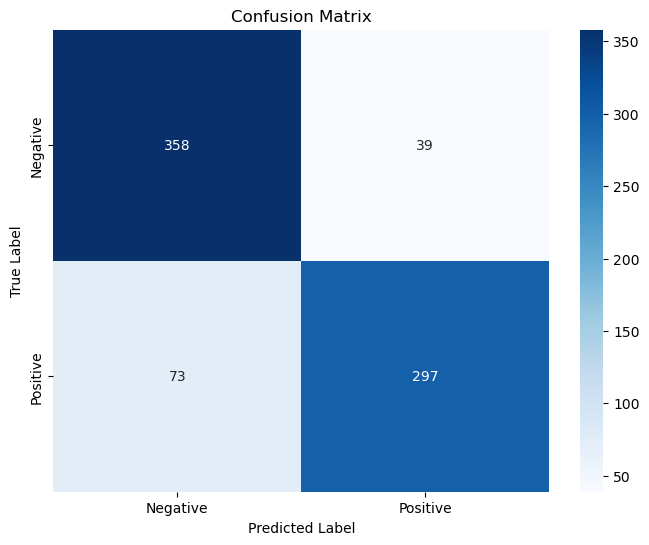

In [69]:
# EVALUASI RANDOM FOREST 
import seaborn as sn
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Membuat confusion matrix
confusion_matrix_rf = confusion_matrix(test_labels, predictions_rf)

# Menampilkan classification report
print("Classification Report:")
print(classification_report(test_labels, predictions_rf))

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix_rf)

# Menghitung dan menampilkan akurasi
accuracy_rf = accuracy_score(test_labels, predictions_rf)
print("Accuracy:", accuracy_rf)

# Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sn.heatmap(confusion_matrix_rf, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Tuning Hyperparameters Naive Bayes

Checking for NaN in training data...
abai            0
abal            0
abaout          0
acara           0
acount          0
               ..
yadiperbarui    0
yah             0
yang            0
yatrus          0
ye              0
Length: 1208, dtype: int64
Checking for NaN in training labels...
0


Best Hyperparameters: {'alpha': 1, 'fit_prior': False}
Best Validation Score: 0.9206529162190537


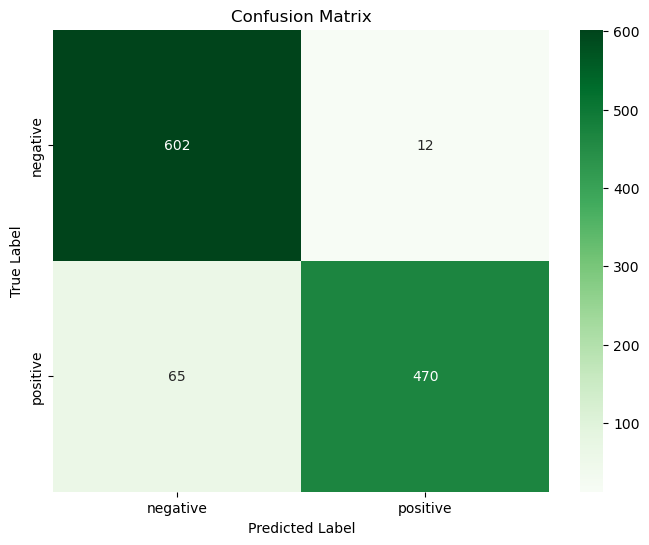

Akurasi  : 0.9329852045256745
Precision: 0.9363319542789735
Recall   : 0.9329852045256745
F1-score : 0.9326253305724667

Classification Report:

              precision    recall  f1-score   support

    negative       0.90      0.98      0.94       614
    positive       0.98      0.88      0.92       535

    accuracy                           0.93      1149
   macro avg       0.94      0.93      0.93      1149
weighted avg       0.94      0.93      0.93      1149



In [70]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

# Periksa data untuk NaN
print("Checking for NaN in training data...")
print(TFIDF_df_train.isna().sum())
print("Checking for NaN in training labels...")
print(pd.Series(train_labels).isna().sum())

# Jika ada NaN, hapus atau impute nilai tersebut
TFIDF_df_train = TFIDF_df_train.dropna()
train_labels = pd.Series(train_labels).dropna()

# Inisialisasi model
model = MultinomialNB()

# Tentukan nilai alpha yang akan diuji dan fit_prior skema
param_grid = {
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
    'fit_prior': [False, True]
}

# Inisialisasi objek GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=10, return_train_score=True)

# Lakukan grid search pada data latih
grid_search.fit(TFIDF_df_train, train_labels)

# Cetak parameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# Cetak skor validasi terbaik
print("Best Validation Score:", grid_search.best_score_)

TFIDF_df_test = TFIDF_df_train  
test_labels = train_labels  

# Prediksi dengan model terbaik
predictions = grid_search.predict(TFIDF_df_test)

# Visualisasi Confusion Matrix
columns = ['negative', 'positive']
confm = confusion_matrix(test_labels, predictions)
df_cm = pd.DataFrame(confm, index=columns, columns=columns)

plt.figure(figsize=(8, 6))
sn.heatmap(df_cm, cmap='Greens', annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Menghitung metrik evaluasi
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions, average='weighted')
recall = recall_score(test_labels, predictions, average='weighted')
f1 = f1_score(test_labels, predictions, average='weighted')

print("Akurasi  :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)

# Cetak classification report
report = classification_report(test_labels, predictions, target_names=columns)
print("\nClassification Report:\n")
print(report)


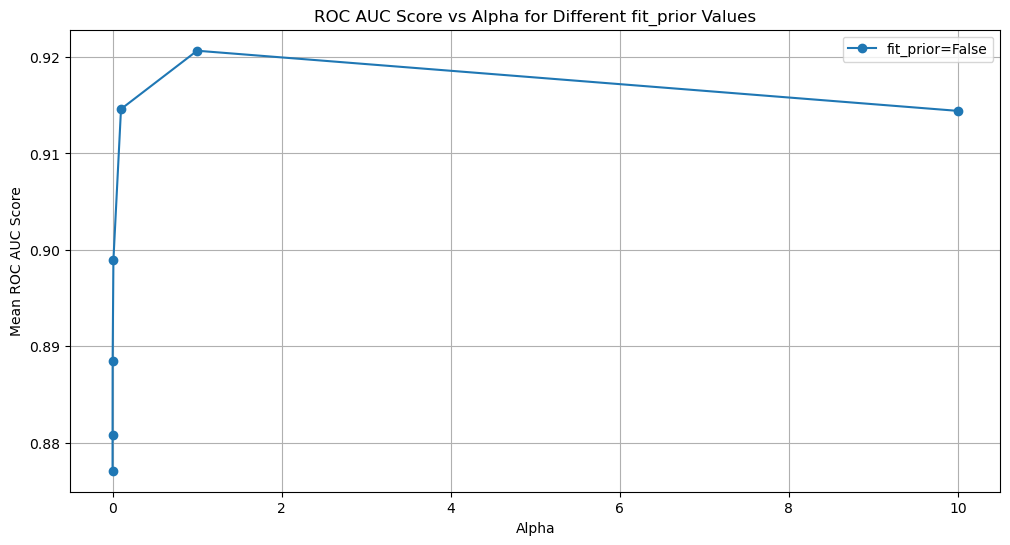

In [71]:
# Simpan hasil grid search
results = pd.DataFrame(grid_search.cv_results_)

# Visualisasi hasil grid search
plt.figure(figsize=(12, 6))

# # Plot untuk fit_prior=True
# subset = results[results['param_fit_prior'] == True]
# plt.plot(subset['param_alpha'], subset['mean_test_score'], label='fit_prior=True', marker='o')

# Plot untuk fit_prior=False
subset = results[results['param_fit_prior'] == False]
plt.plot(subset['param_alpha'], subset['mean_test_score'], label='fit_prior=False', marker='o')

plt.xlabel('Alpha')
plt.ylabel('Mean ROC AUC Score')
plt.title('ROC AUC Score vs Alpha for Different fit_prior Values')
plt.legend()
plt.grid(True)
plt.show()


Checking for NaN in training data...
abai            0
abal            0
abaout          0
acara           0
acount          0
               ..
yadiperbarui    0
yah             0
yang            0
yatrus          0
ye              0
Length: 1208, dtype: int64
Checking for NaN in training labels...
0


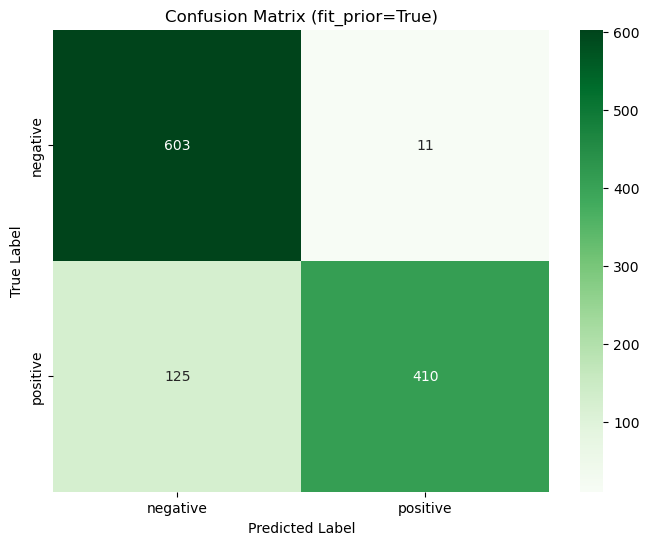

Akurasi  : 0.8816362053959965
Precision: 0.8960796810238338
Recall   : 0.8816362053959965
F1-score : 0.879606324146443

Classification Report (fit_prior=True):

              precision    recall  f1-score   support

    negative       0.83      0.98      0.90       614
    positive       0.97      0.77      0.86       535

    accuracy                           0.88      1149
   macro avg       0.90      0.87      0.88      1149
weighted avg       0.90      0.88      0.88      1149



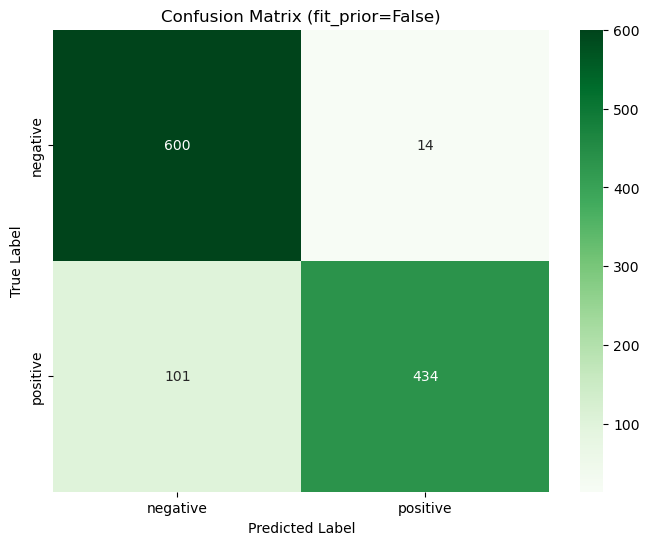

Akurasi  : 0.8999129677980853
Precision: 0.9084562228645141
Recall   : 0.8999129677980853
F1-score : 0.898794751335669

Classification Report (fit_prior=False):

              precision    recall  f1-score   support

    negative       0.86      0.98      0.91       614
    positive       0.97      0.81      0.88       535

    accuracy                           0.90      1149
   macro avg       0.91      0.89      0.90      1149
weighted avg       0.91      0.90      0.90      1149



In [72]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

# Periksa data untuk NaN
print("Checking for NaN in training data...")
print(TFIDF_df_train.isna().sum())
print("Checking for NaN in training labels...")
print(pd.Series(train_labels).isna().sum())

# Jika ada NaN, hapus atau impute nilai tersebut
TFIDF_df_train = TFIDF_df_train.dropna()
train_labels = pd.Series(train_labels).dropna()

# Inisialisasi model
model = MultinomialNB()

# Tentukan nilai alpha yang akan diuji
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

# Inisialisasi list untuk menyimpan skor
scores_true = []
scores_false = []

# Lakukan grid search dengan fit_prior=True
for alpha in alphas:
    grid_search_true = GridSearchCV(model, {'alpha': [alpha], 'fit_prior': [True]}, scoring='roc_auc', cv=10)
    grid_search_true.fit(TFIDF_df_train, train_labels)
    scores_true.append(grid_search_true.best_score_)

# Lakukan grid search dengan fit_prior=False
for alpha in alphas:
    grid_search_false = GridSearchCV(model, {'alpha': [alpha], 'fit_prior': [False]}, scoring='roc_auc', cv=10)
    grid_search_false.fit(TFIDF_df_train, train_labels)
    scores_false.append(grid_search_false.best_score_)

# Prediksi dengan model terbaik
predictions = grid_search_true.predict(TFIDF_df_test)  # Menggunakan model dengan fit_prior=True

# Visualisasi Confusion Matrix
columns = ['negative', 'positive']
confm = confusion_matrix(test_labels, predictions)
df_cm = pd.DataFrame(confm, index=columns, columns=columns)

plt.figure(figsize=(8, 6))
sn.heatmap(df_cm, cmap='Greens', annot=True, fmt='d')
plt.title('Confusion Matrix (fit_prior=True)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Menghitung metrik evaluasi
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions, average='weighted')
recall = recall_score(test_labels, predictions, average='weighted')
f1 = f1_score(test_labels, predictions, average='weighted')

print("Akurasi  :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)


# Cetak classification report
report = classification_report(test_labels, predictions, target_names=columns)
print("\nClassification Report (fit_prior=True):\n")
print(report)

print("================================================")

# Prediksi dengan model terbaik
predictions_f = grid_search_false.predict(TFIDF_df_test)  # Menggunakan model dengan fit_prior=False

# Visualisasi Confusion Matrix
confm = confusion_matrix(test_labels, predictions_f)
df_cm = pd.DataFrame(confm, index=columns, columns=columns)

plt.figure(figsize=(8, 6))
sn.heatmap(df_cm, cmap='Greens', annot=True, fmt='d')
plt.title('Confusion Matrix (fit_prior=False)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Menghitung metrik evaluasi
accuracy = accuracy_score(test_labels, predictions_f)
precision = precision_score(test_labels, predictions_f, average='weighted')
recall = recall_score(test_labels, predictions_f, average='weighted')
f1 = f1_score(test_labels, predictions_f, average='weighted')

print("Akurasi  :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)

# Cetak classification report
report = classification_report(test_labels, predictions_f, target_names=columns)
print("\nClassification Report (fit_prior=False):\n")
print(report)


In [73]:
# Simpan hasil performa tuning hyperparameter dalam dictionary
performa_tuning = {
    "Best Hyperparameters": grid_search.best_params_,
    "Best Validation Score": grid_search.best_score_,
    "Mean Train Scores": grid_search.cv_results_['mean_train_score'],
    "Mean Validation Scores": grid_search.cv_results_['mean_test_score'],
    "Alpha Values": param_grid['alpha']
}

print(performa_tuning)


{'Best Hyperparameters': {'alpha': 1, 'fit_prior': False}, 'Best Validation Score': 0.9206529162190537, 'Mean Train Scores': array([0.99041226, 0.99041226, 0.99038031, 0.99038031, 0.99027657,
       0.99027657, 0.98984322, 0.98984322, 0.98625618, 0.98625618,
       0.96398398, 0.96398398, 0.93606899, 0.93606899]), 'Mean Validation Scores': array([0.87708611, 0.87708611, 0.88077083, 0.88077083, 0.88850954,
       0.88850954, 0.89890584, 0.89890584, 0.91460113, 0.91460113,
       0.92065292, 0.92065292, 0.91441159, 0.91441159]), 'Alpha Values': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]}


Akurasi model setelah tuning hyperparameter: 0.9260226283724978

Classification Report (After Tuning):

              precision    recall  f1-score   support

    negative       0.89      0.98      0.93       614
    positive       0.98      0.86      0.92       535

    accuracy                           0.93      1149
   macro avg       0.93      0.92      0.92      1149
weighted avg       0.93      0.93      0.93      1149


Akurasi (After Tuning)  : 0.9260226283724978
Presisi (After Tuning) : 0.9307380701354957
Recall (After Tuning)  : 0.9260226283724978
F1-score (After Tuning): 0.925513564733094


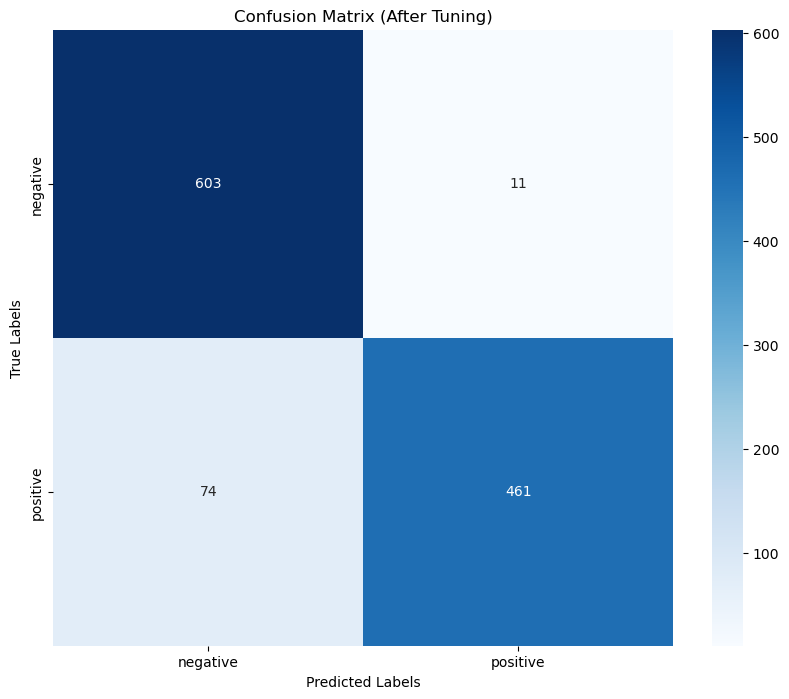

In [74]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi model dengan parameter terbaik
best_model = MultinomialNB(alpha=1)

# Training ulang model dengan seluruh data latih
best_model.fit(TFIDF_df_train, train_labels)

# Prediksi label pada data uji
predicted_labels = best_model.predict(TFIDF_df_test)

# Menghitung akurasi model pada data uji
accuracy = accuracy_score(test_labels, predicted_labels)
print("Akurasi model setelah tuning hyperparameter:", accuracy)

# Print klasifikasi report
report = classification_report(test_labels, predicted_labels, target_names=columns)
print("\nClassification Report (After Tuning):\n")
print(report)

# Menghitung akurasi, presisi, recall, dan F1-score setelah tuning
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

print("\nAkurasi (After Tuning)  :", accuracy)
print("Presisi (After Tuning) :", precision)
print("Recall (After Tuning)  :", recall)
print("F1-score (After Tuning):", f1)

# Membuat confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=columns, yticklabels=columns)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (After Tuning)')
plt.show()



In [75]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisialisasi list untuk menyimpan skor akurasi
accuracy_scores = []

# Loop untuk mencoba nilai alpha dari 0.00001 hingga 1000
for alpha_value in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Inisialisasi model dengan alpha tertentu
    model = MultinomialNB(alpha=alpha_value)
    
    # Melatih model dengan data latih
    model.fit(TFIDF_df_train, train_labels)
    
    # Prediksi label pada data uji
    predicted_labels = model.predict(TFIDF_df_test)
    
    # Menghitung akurasi model
    accuracy = accuracy_score(test_labels, predicted_labels)
    
    # Menyimpan skor akurasi
    accuracy_scores.append((alpha_value, accuracy))
    
    # Print skor akurasi setiap iterasi
    print(f"Alpha: {alpha_value}, Accuracy: {accuracy}")


Alpha: 1e-05, Accuracy: 0.9547432550043516
Alpha: 0.0001, Accuracy: 0.9547432550043516
Alpha: 0.001, Accuracy: 0.9538729329852045
Alpha: 0.01, Accuracy: 0.9530026109660574
Alpha: 0.1, Accuracy: 0.9469103568320278
Alpha: 1, Accuracy: 0.9260226283724978
Alpha: 10, Accuracy: 0.8816362053959965
Alpha: 100, Accuracy: 0.7328111401218451
Alpha: 1000, Accuracy: 0.5343777197563099


In [76]:
grid_search.cv_results_

{'mean_fit_time': array([0.01261108, 0.01317296, 0.01338074, 0.0214958 , 0.01412251,
        0.0111166 , 0.01188302, 0.01344864, 0.01370814, 0.01291401,
        0.01240196, 0.01216269, 0.01301031, 0.0120929 ]),
 'std_fit_time': array([0.00348424, 0.00275563, 0.0030607 , 0.02471057, 0.00347667,
        0.00297106, 0.00285668, 0.00242324, 0.00237878, 0.00267893,
        0.00283881, 0.00266164, 0.00370871, 0.00275887]),
 'mean_score_time': array([0.00742502, 0.00628529, 0.0076798 , 0.00868242, 0.00669913,
        0.00973222, 0.00931027, 0.00804412, 0.00827875, 0.00796881,
        0.00739963, 0.00846672, 0.0079706 , 0.00777667]),
 'std_score_time': array([0.00392959, 0.00322994, 0.00197761, 0.00425627, 0.00272297,
        0.0034421 , 0.00208936, 0.00144376, 0.00232972, 0.00346149,
        0.00359289, 0.00216192, 0.00330728, 0.00273261]),
 'param_alpha': masked_array(data=[1e-05, 1e-05, 0.0001, 0.0001, 0.001, 0.001, 0.01, 0.01,
                    0.1, 0.1, 1, 1, 10, 10],
              mask

Akurasi model setelah tuning hyperparameter: 0.9564838990426457

Classification Report (After Tuning):

              precision    recall  f1-score   support

    negative       0.94      0.98      0.96       614
    positive       0.98      0.93      0.95       535

    accuracy                           0.96      1149
   macro avg       0.96      0.95      0.96      1149
weighted avg       0.96      0.96      0.96      1149


Akurasi (After Tuning)  : 0.9564838990426457
Presisi (After Tuning) : 0.9574355435251573
Recall (After Tuning)  : 0.9564838990426457
F1-score (After Tuning): 0.9563842818206907


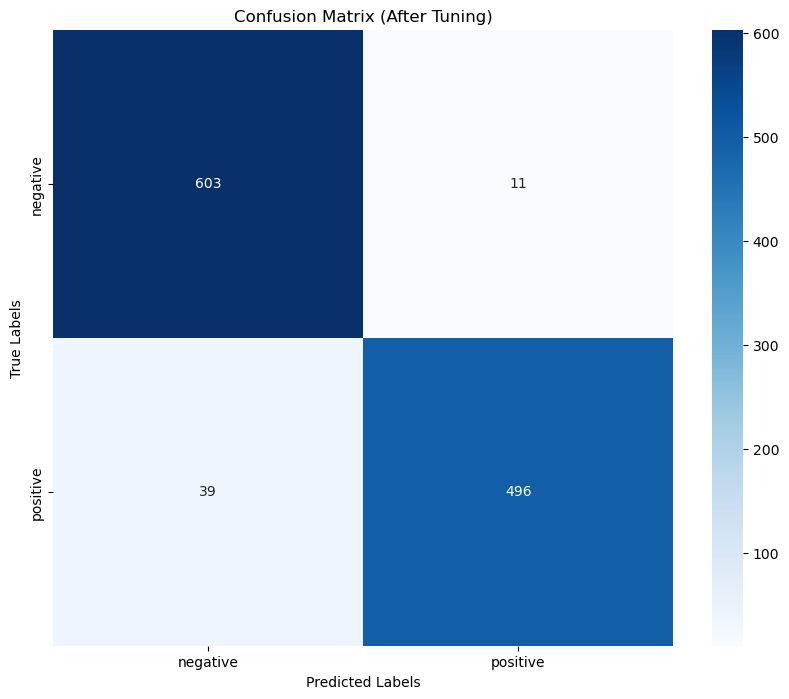

In [77]:
# alpha=0.0001,  fit_prior=False

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi model dengan parameter terbaik
best_model = MultinomialNB(alpha=0.0001,  fit_prior=False)

# Training ulang model dengan seluruh data latih
best_model.fit(TFIDF_df_train, train_labels)

# Prediksi label pada data uji
predicted_labels = best_model.predict(TFIDF_df_test)

# Menghitung akurasi model pada data uji
accuracy = accuracy_score(test_labels, predicted_labels)
print("Akurasi model setelah tuning hyperparameter:", accuracy)

# Print klasifikasi report
report = classification_report(test_labels, predicted_labels, target_names=columns)
print("\nClassification Report (After Tuning):\n")
print(report)

# Menghitung akurasi, presisi, recall, dan F1-score setelah tuning
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

print("\nAkurasi (After Tuning)  :", accuracy)
print("Presisi (After Tuning) :", precision)
print("Recall (After Tuning)  :", recall)
print("F1-score (After Tuning):", f1)

# Membuat confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=columns, yticklabels=columns)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (After Tuning)')
plt.show()


## Tuning hyperparameters dengan Random Forest model

In [78]:
# Random Forest dengan Hyperparameter Tuning PERTAMA
params_rf = {'n_estimators':[50, 100, 300], 'max_features':[2, 3, 4], 'max_depth':[3, 5, 7, 9], 'min_samples_split': [2, 5, 8]}
grid_rf = GridSearchCV(model_rf, param_grid=params_rf, cv=5)
grid_rf.fit(TFIDF_df_train, train_labels)
predicted_labels = grid_rf.predict(TFIDF_df_test)
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels)
recall = recall_score(test_labels, predicted_labels)
f1 = f1_score(test_labels, predicted_labels)

print('RandomForest Accuracy: {:.2f}'.format(accuracy))
print('RandomForest Precision: {:.2f}'.format(precision))
print('RandomForest Recall: {:.2f}'.format(recall))
print('RandomForest F1-score: {:.2f}'.format(f1))

RandomForest Accuracy: 0.72
RandomForest Precision: 0.99
RandomForest Recall: 0.41
RandomForest F1-score: 0.58


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


c:\Users\Widnyana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
420 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
267 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Widnyana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Widnyana\anaconda3\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Widnyana\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Widnyana\anaconda3

RandomForest Accuracy: 0.89
RandomForest Precision: 0.89
RandomForest Recall: 0.89
RandomForest F1-score: 0.89

Classification Report (Random Forest After Tuning):

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       614
           1       0.92      0.83      0.87       535

    accuracy                           0.89      1149
   macro avg       0.89      0.88      0.89      1149
weighted avg       0.89      0.89      0.89      1149



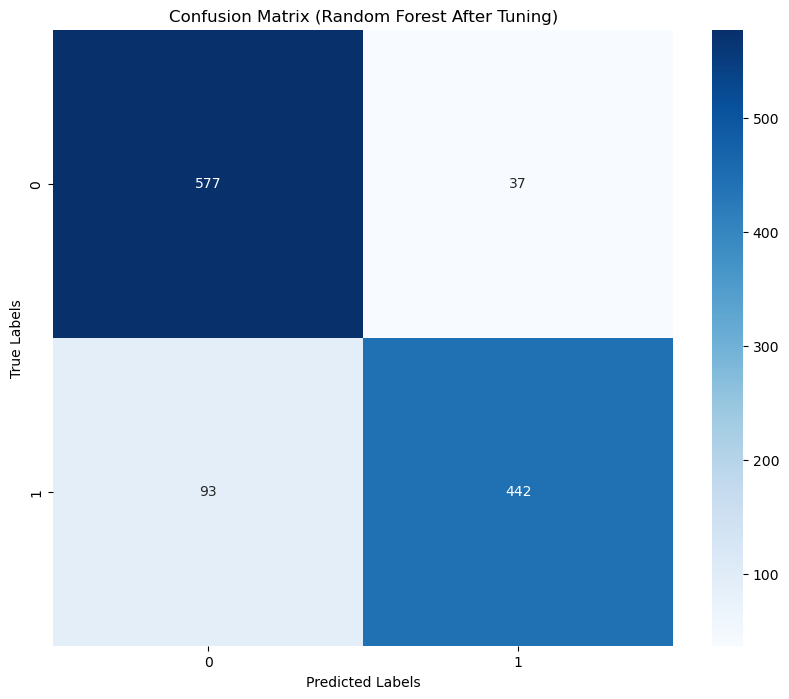


Best Parameters Found: 
 {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': False}


In [79]:
# Random Forest dengan Hyperparameter Tuning KEDUA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Inisialisasi model RandomForest
rf = RandomForestClassifier()

# Parameter grid yang lebih luas
params_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV untuk mencari hyperparameter terbaik
random_rf = RandomizedSearchCV(estimator=rf, param_distributions=params_rf, n_iter=100, cv=10, verbose=2, random_state=42, n_jobs=-1)
random_rf.fit(TFIDF_df_train, train_labels)

# Prediksi dengan model terbaik
best_rf = random_rf.best_estimator_
predicted_labels = best_rf.predict(TFIDF_df_test)

# Menghitung metrik kinerja
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

print('RandomForest Accuracy: {:.2f}'.format(accuracy))
print('RandomForest Precision: {:.2f}'.format(precision))
print('RandomForest Recall: {:.2f}'.format(recall))
print('RandomForest F1-score: {:.2f}'.format(f1))

# Print klasifikasi report
report = classification_report(test_labels, predicted_labels)
print("\nClassification Report (Random Forest After Tuning):\n")
print(report)

# Membuat confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Random Forest After Tuning)')
plt.show()

# Print best parameters
print("\nBest Parameters Found: \n", random_rf.best_params_)


In [80]:
# Random Forest dengan Hyperparameter Tuning KETIGA
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Define the Random Forest classifier
# rf = RandomForestClassifier()

# # Updated parameter grid
# params_rf = {
#     'bootstrap': [True, False],
#     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
#     'max_features': ['auto', 'sqrt'],
#     'min_samples_leaf': [1, 2, 4],
#     'min_samples_split': [2, 5, 10],
#     'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
# }

# # Create GridSearchCV
# grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

# # Fit the model
# grid_rf.fit(TFIDF_df_train, train_labels)

# # Predictions
# predicted_labels = grid_rf.predict(TFIDF_df_test)

# # Calculate evaluation metrics
# accuracy = accuracy_score(test_labels, predicted_labels)
# precision = precision_score(test_labels, predicted_labels)
# recall = recall_score(test_labels, predicted_labels)
# f1 = f1_score(test_labels, predicted_labels)

# # Print evaluation metrics
# print('RandomForest Accuracy: {:.2f}'.format(accuracy))
# print('RandomForest Precision: {:.2f}'.format(precision))
# print('RandomForest Recall: {:.2f}'.format(recall))
# print('RandomForest F1-score: {:.2f}'.format(f1))


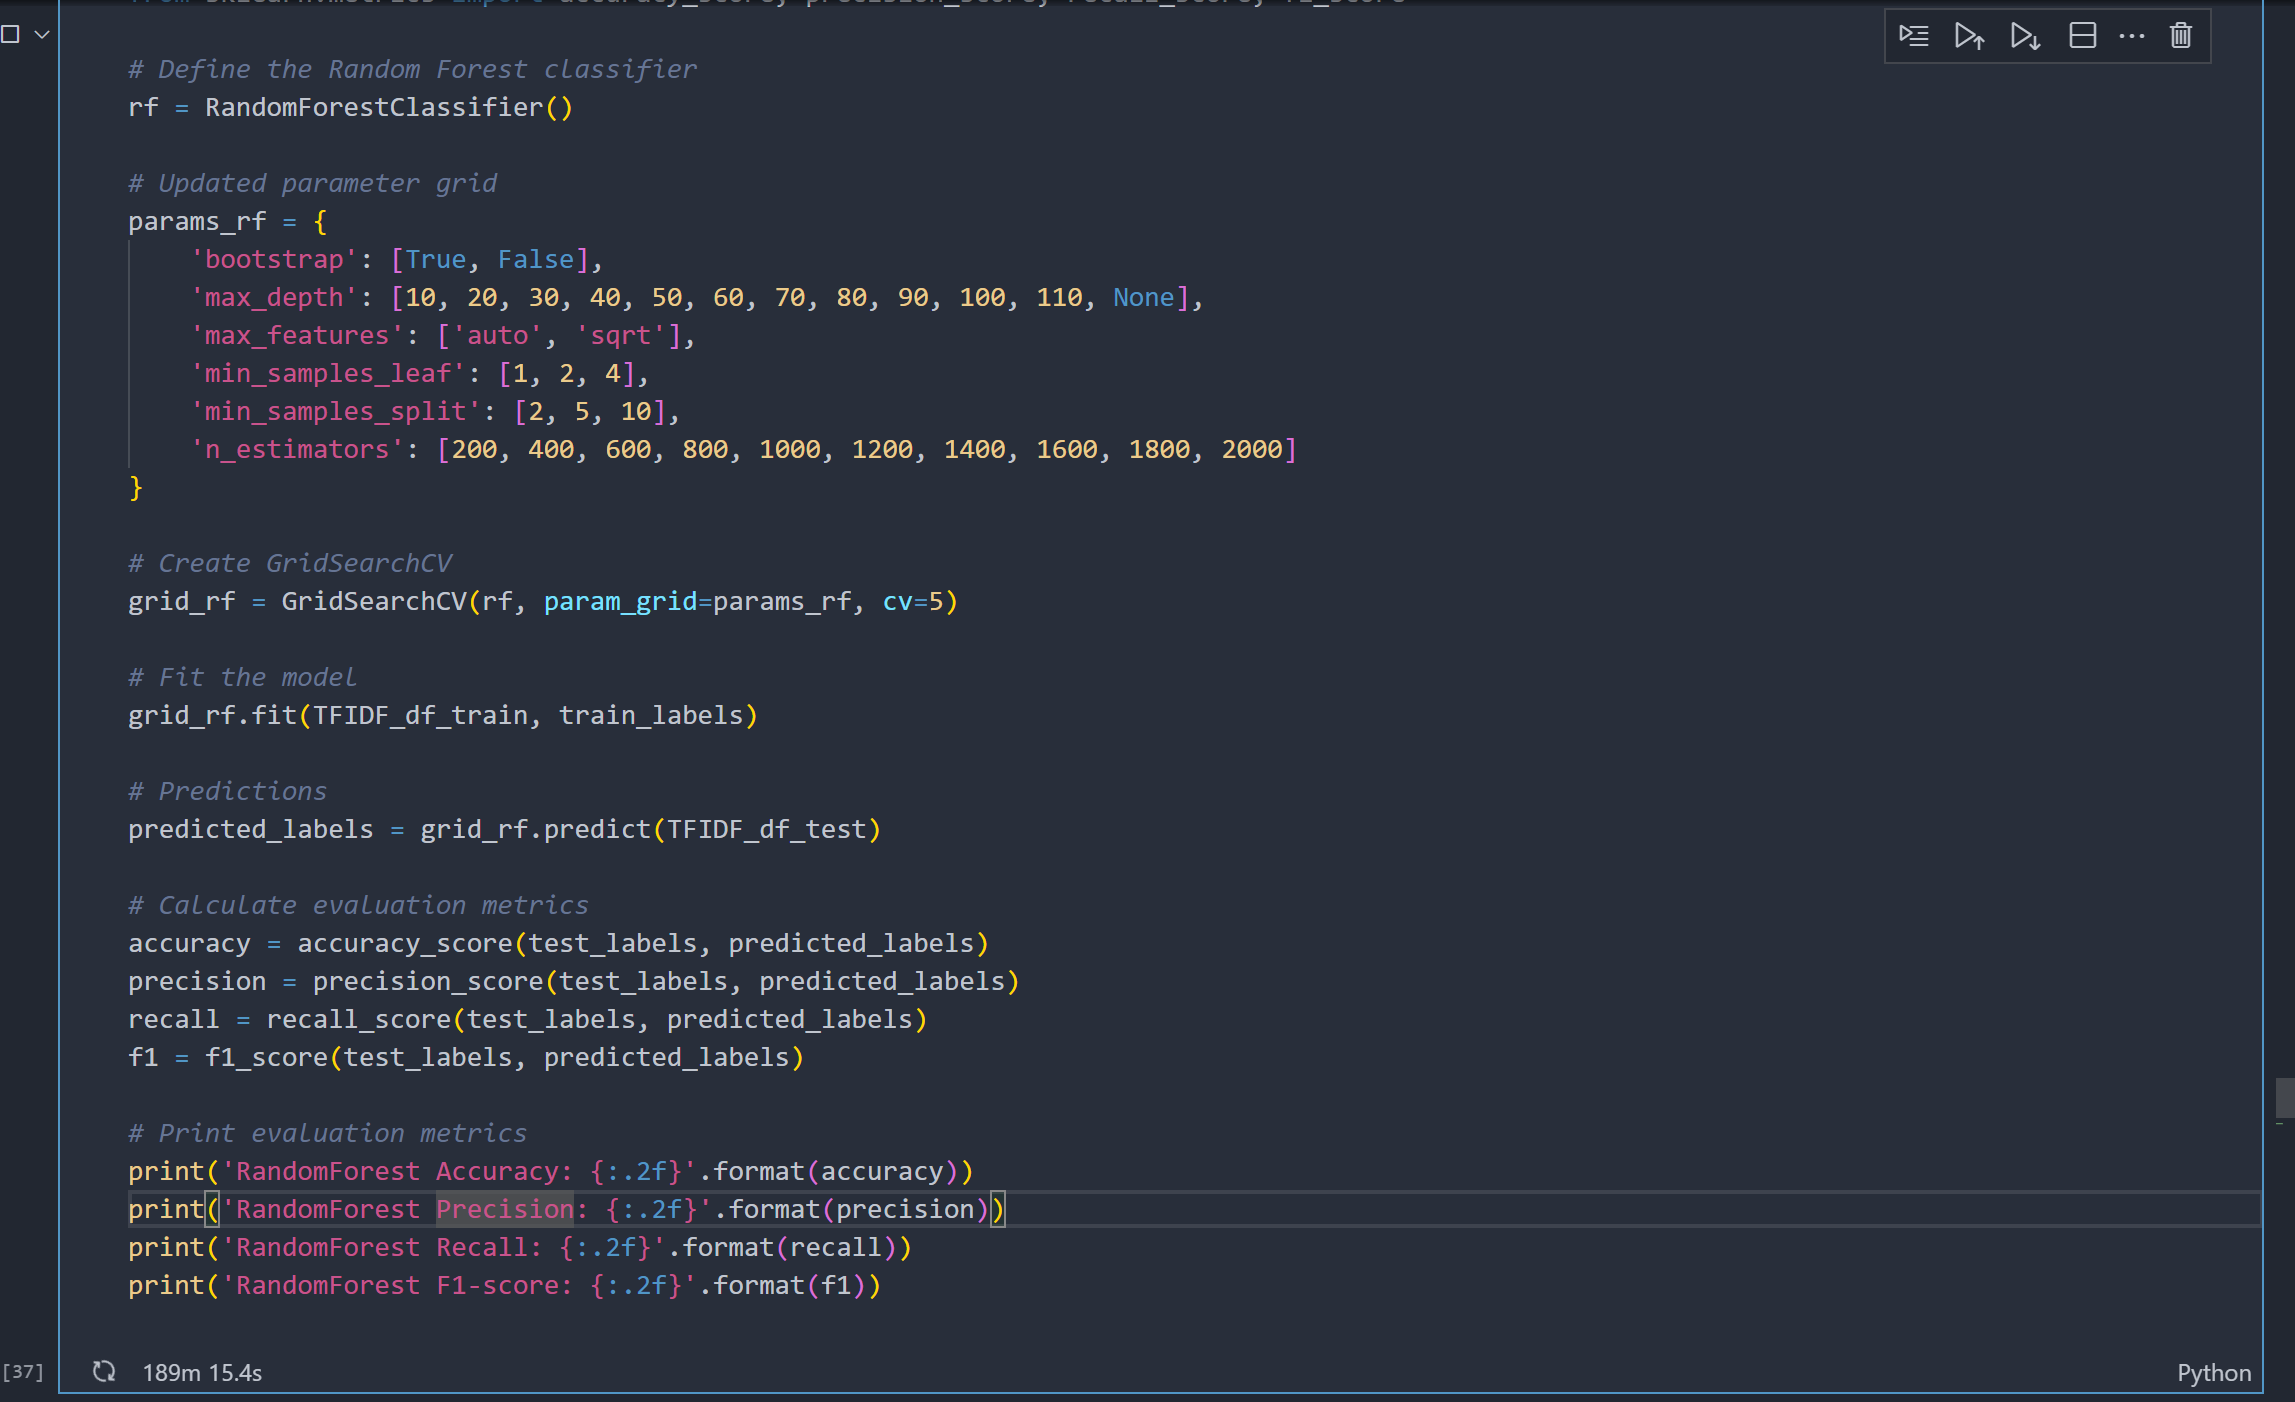

## Uji datatesting dengan model tuning dan simpan model

In [81]:
import pickle
# Simpan model NAIVE BAYES YANG TELAH DITUNING menjadi file pickle
model_filename = 'best_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model telah disimpan ke {model_filename}")

Model telah disimpan ke best_model.pkl


### uji dengan data testing

In [82]:
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi model Multinomial Naive Bayes dengan parameter terbaik

best_model = MultinomialNB(alpha=0.00001,  fit_prior=False)

# Latih model pada seluruh data latih
best_model.fit(TFIDF_df_train, train_labels)

# Lakukan prediksi pada data uji
predictions_tuning = best_model.predict(TFIDF_df_test)

# Simpan hasil prediksi ke dalam DataFrame
results_df = pd.DataFrame({'Data Testing': TFIDF_df_test.index, 'Label Asli': test_labels, 'Label Prediksi': predictions_tuning})

# Menyimpan DataFrame ke dalam file Excel
results_df.to_excel('result.xlsx', index=False)


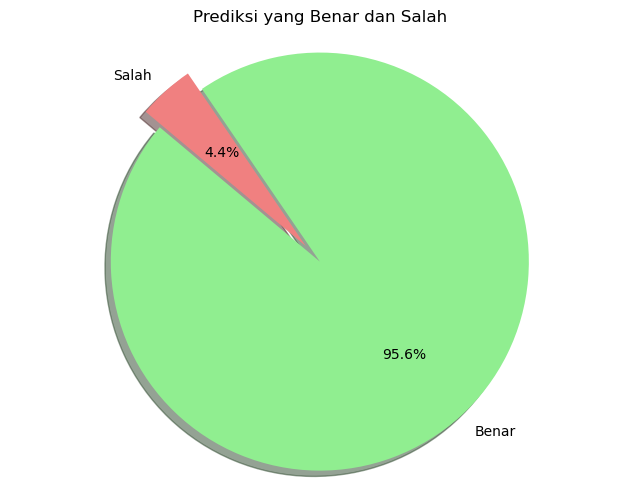

In [83]:
import matplotlib.pyplot as plt

# Hitung jumlah prediksi yang benar dan salah
correct_predictions = (predictions_tuning == test_labels).sum()
incorrect_predictions = len(predictions_tuning) - correct_predictions

# Persiapkan data untuk diagram pie
labels = ['Benar', 'Salah']
sizes = [correct_predictions, incorrect_predictions]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # Pisahkan potongan 'Benar'

# Buat diagram pie
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Prediksi yang Benar dan Salah')
plt.axis('equal')  
plt.show()


### PENGUJIAN INPUT USER NAIVE BAYES TUNING

In [84]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def preprocess_text(text):
    # Tokenisasi teks
    tokens = word_tokenize(text)
    
    # Menghapus stopwords Bahasa Indonesia
    stop_words = set(stopwords.words('indonesian'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Stemming menggunakan Sastrawi
    stemmer = StemmerFactory().create_stemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    # Menggabungkan token-token yang telah diproses kembali menjadi teks
    processed_text = ' '.join(stemmed_tokens)
    
    return processed_text

def predict_sentiment(text):
    # Preprocess teks input pengguna (tokenisasi, normalisasi, stopword removal, stemming, dll.)
    processed_text = preprocess_text(text)
    
    # Ekstraksi fitur pada teks yang telah diproses
    tf_text = cvect.transform([processed_text])
    
    # Memilih fitur yang relevan
    tf_text_selected = selector.transform(tf_text)
    
    # Melatih model menggunakan data latih yang terpilih
    best_model.fit(tfidf_mat_train_selected, train_labels)

    # Melakukan prediksi sentimen menggunakan model Naive Bayes yang telah dilatih
    prediction = best_model.predict(tf_text_selected)
    
    # Mengembalikan hasil prediksi sentimen
    return prediction

# Contoh teks input dari pengguna
user_input = "Aplikasi ini tidak berguna"
# Memprediksi sentimen berdasarkan teks input pengguna
prediction = predict_sentiment(user_input)

# Menampilkan hasil prediksi sentimen
if prediction == 0:
    print("Hasil prediksi sentimen: Negatif")
else:
    print("Hasil prediksi sentimen: Positif")


Hasil prediksi sentimen: Negatif


In [85]:
def predict_sentiment_with_prob(text):
    # Preprocess teks input pengguna (tokenisasi, normalisasi, stopword removal, stemming, dll.)
    processed_text = preprocess_text(text)
    
    # Ekstraksi fitur pada teks yang telah diproses
    tf_text = cvect.transform([processed_text])
    
    # Memilih fitur yang relevan
    tf_text_selected = selector.transform(tf_text)
    
    # Melakukan prediksi sentimen menggunakan model Naive Bayes yang telah dilatih
    probabilities = best_model.predict_proba(tf_text_selected)
    prediction = best_model.predict(tf_text_selected)
    
    # Mengembalikan hasil prediksi sentimen dan probabilitasnya
    return prediction, probabilities

# Contoh teks input dari pengguna
user_input = "bagus banget desain aplikasi ini"

# Memprediksi sentimen berdasarkan teks input pengguna
prediction, probabilities = predict_sentiment_with_prob(user_input)

# Menampilkan hasil prediksi sentimen
if prediction == 0:
    print("Hasil prediksi sentimen: Negatif")
else:
    print("Hasil prediksi sentimen: Positif")

# Menampilkan probabilitas prediksi
if prediction == 0:
    print("Tingkat kepercayaan sentimen negatif:", probabilities[0][0] * 100, "%")
else:
    print("Tingkat kepercayaan sentimen positif:", probabilities[0][1] * 100, "%")


Hasil prediksi sentimen: Positif
Tingkat kepercayaan sentimen positif: 93.70578284114612 %


### PENGUJIAN INPUT USER MODEL RANDOM FOREST TUNING

In [86]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def preprocess_text(text):
    # Tokenisasi teks
    tokens = word_tokenize(text)
    
    # Menghapus stopwords Bahasa Indonesia
    stop_words = set(stopwords.words('indonesian'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Stemming menggunakan Sastrawi
    stemmer = StemmerFactory().create_stemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    # Menggabungkan token-token yang telah diproses kembali menjadi teks
    processed_text = ' '.join(stemmed_tokens)
    
    return processed_text

def predict_sentiment(text):
    # Preprocess teks input pengguna (tokenisasi, normalisasi, stopword removal, stemming, dll.)
    processed_text = preprocess_text(text)
    
    # Ekstraksi fitur pada teks yang telah diproses
    tf_text = cvect.transform([processed_text])
    
    # Memilih fitur yang relevan
    tf_text_selected = selector.transform(tf_text)
    
    # Melatih model menggunakan data latih yang terpilih
    best_rf.fit(tfidf_mat_train_selected, train_labels)

    # Melakukan prediksi sentimen menggunakan model Naive Bayes yang telah dilatih
    prediksiRF= best_rf.predict(tf_text_selected)
    
    # Mengembalikan hasil prediksi sentimen
    return prediksiRF

# Contoh teks input dari pengguna
user_input = "WOWOWWWWWWWWWWW aplikasi ini super keren dan Bagusss"
# Memprediksi sentimen berdasarkan teks input pengguna
prediksiRF = predict_sentiment(user_input)

# Menampilkan hasil prediksi sentimen
if prediksiRF == 0:
    print("Hasil prediksi sentimen: Negatif")
else:
    print("Hasil prediksi sentimen: Positif")


Hasil prediksi sentimen: Positif


### SIMPAN SEMUA MODEL DAN KEPERLUAN LAIN

In [87]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

# Membuat dan melatih CountVectorizer
cvect = CountVectorizer()
TFIDF_vector_train = cvect.fit_transform(train_data)

# Simpan CountVectorizer
with open('cvect.pkl', 'wb') as file:
    pickle.dump(cvect, file)


In [88]:
import pickle

# Menyimpan model TANPA TUNING
with open('NB_NO TUNING.pkl', 'wb') as f:
    pickle.dump(model, f)


In [89]:
# Simpan selector
with open('selector.pkl', 'wb') as file:
    pickle.dump(selector, file)

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Buat instance dari TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Latih TfidfVectorizer menggunakan data latih
tfidf_vectorizer.fit(train_data)

# Simpan TfidfVectorizer ke file
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)
